In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import math

In [ ]:
file_paths = ['/content/volerup.csv','/content/quakes_all.csv','/content/flood.csv','/content/fire.csv']

datas = []
for path in file_paths:
  data = pd.read_csv(path, sep='\t')
  data[['Latitude', 'Longitude']] = data.iloc[:, 0].str.split(',', expand=True)
  data = data[1:]
  data.reset_index(drop=True, inplace=True)
  data=data.dropna(inplace=False)
  datas.append(data)

In [ ]:
data.columns

Index(['# https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/active-fire-data',
       'Latitude', 'Longitude'],
      dtype='object')

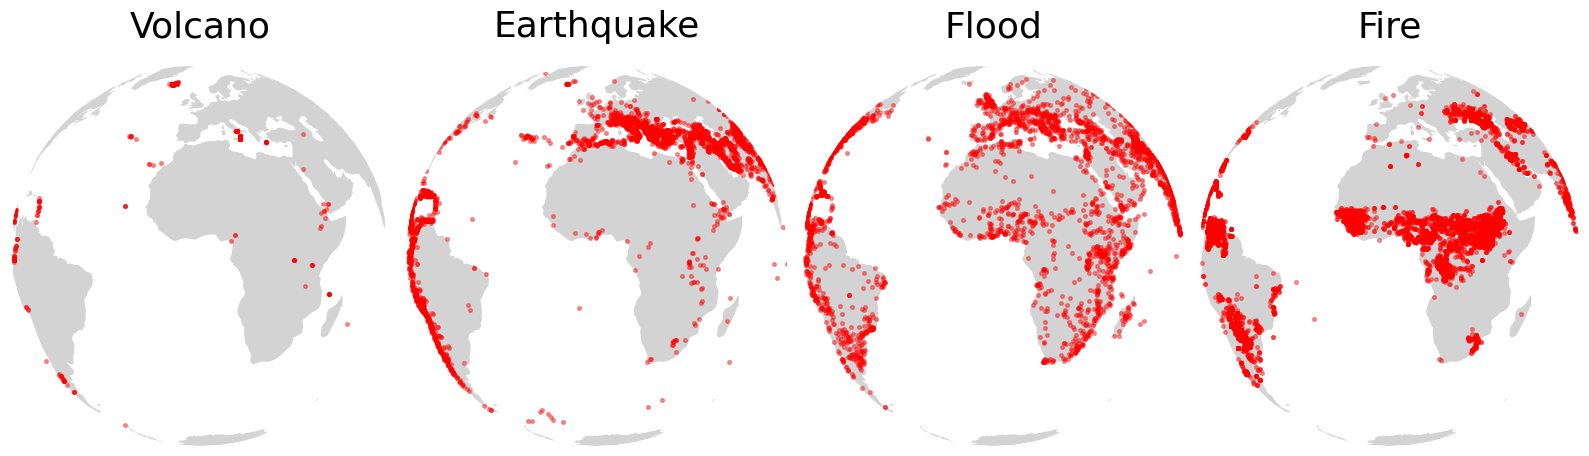

In [ ]:
# Assuming 'datas' is a list of DataFrames for each category (Volcano, Earthquake, etc.)

# Create a figure with 4 subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, subplot_kw={'projection': ccrs.Orthographic(central_longitude=0)}, figsize=(16, 8))

titles = ['Volcano', 'Earthquake', 'Flood', 'Fire']

# Style configuration
point_color = 'red'
dot_size = 7
alpha_value = 0.4
title_font_size = 26

for ax, title, data in zip(axes, titles, datas):
    ax.set_global()
    # ax.coastlines(resolution='110m', color='black', linewidth=0)
    ax.set_title(title, fontsize=title_font_size, pad=20)
    ax.set_frame_on(False)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Landmass color

    data_clean = data.dropna(subset=['Latitude', 'Longitude'])
    data_clean['Latitude'] = pd.to_numeric(data_clean['Latitude'], errors='coerce')
    data_clean['Longitude'] = pd.to_numeric(data_clean['Longitude'], errors='coerce')

    latitudes = data_clean['Latitude'].to_numpy()
    longitudes = data_clean['Longitude'].to_numpy()

    # print(latitudes, longitudes)

    ax.scatter(longitudes, latitudes, color=point_color, s=dot_size, alpha=alpha_value, transform=ccrs.PlateCarree())

plt.tight_layout()
plt.savefig('earth.pdf')

In [ ]:
def to_xyz(longitude, latitude):
  phi = math.pi*(longitude/180 + 1)
  theta = math.pi*(latitude/180 + 0.5)
  x = math.sin(theta)*math.cos(phi)
  y = math.sin(theta)*math.sin(phi)
  z = math.cos(theta)
  return x, y, z

In [ ]:
def from_xyz(x, y, z):
  phi = math.atan2(y, x)
  theta = math.acos(z)
  latitude = 180*(theta/math.pi - 0.5)
  longitude = 180*(phi/math.pi - 1)
  return longitude, latitude

In [ ]:
for df in datas:
  df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
  df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
  df[['x','y','z']] = df.apply(lambda x: to_xyz(x.Longitude, x.Latitude), axis=1,result_type='expand')


In [ ]:
for df, title in zip(datas, titles):
  df.to_csv(f'{title}_xyz.csv', index=False)

In [ ]:
volcano_df = datas[3]

In [ ]:
import torch

In [ ]:
np_x = volcano_df.x.to_numpy()
np_y = volcano_df.y.to_numpy()
np_z = volcano_df.z.to_numpy()

torch_x = torch.from_numpy(np_x)
torch_y = torch.from_numpy(np_y)
torch_z = torch.from_numpy(np_z)

torch_positions = torch.stack((torch_x, torch_y, torch_z), dim=1)
torch_velocities = torch.zeros_like(torch_positions)

torch_qps = torch.cat([torch_positions, torch_velocities], dim =1)
print(torch_qps.shape)

torch.Size([12808, 6])


In [ ]:
torch.save(torch_qps,'fire_qps.pth')